In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

import numpy as np
np.set_printoptions(linewidth=105)

<font color='red'>

# Machine Learning: Unsupervised learning (Part 3)


# 6. CASE STUDY: Credit cards data analysis


This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

### The goal is to segment the customers (card holders) in order to define a marketing strategy.

- How many clusters do you see? 

- How can you characterize them?

- Do we have missing data and how will you manage it?

As usual we begin by importing libraries and the data. We'll check for missing values.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data =pd.read_csv("data/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


## Reformatting the data

In [15]:
data=data.drop(['CUST_ID'], axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
missing  = np.sum(np.where(datadrop.isnull(),1,0),axis=0)
print(missing)

[  0   0   0   0   0   0   0   0   0   0   0   0   1   0 313   0   0]


In [17]:
datadrop=data.dropna(axis=1)
datadrop.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,0.000000,12


In [18]:
datafill=data.fillna(data.mean())
datafill.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
missing = data.isnull().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [20]:
missing = datadrop.isnull().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [21]:
missing = datafill.isnull().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## 3 Normalization

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
datadropnorm = scaler.fit_transform(datadrop.astype(float))

Let's visualize it:

In [23]:
attributes=datadrop.columns.tolist()
print(attributes)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


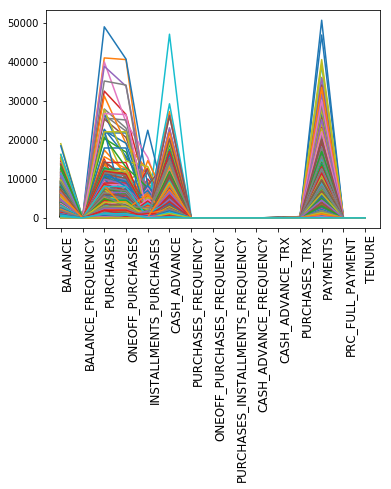

In [24]:
%matplotlib inline

plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

for i in range(datadrop.shape[0]):
    plt.plot(np.arange(datadrop.shape[1]), datadrop.loc[i])
    

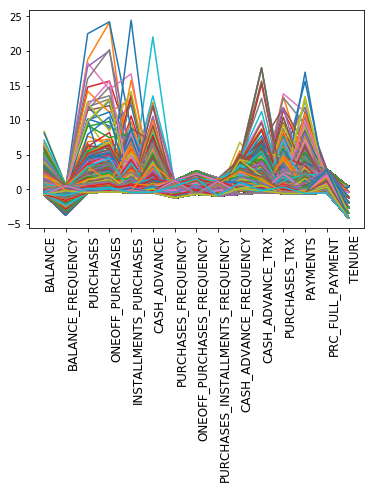

In [25]:
plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

for i in range(datadropnorm.shape[0]):
    plt.plot(np.arange(datadropnorm.shape[1]), datadropnorm[i])
    

## 4. Let's cluster the data

In [26]:
from sklearn import cluster

K=3

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
clf.fit(datadropnorm)
y_pred = clf.predict(datadropnorm)
 

In [27]:
print(y_pred[1:50])

[2 1 2 2 1 0 1 2 2 1 2 1 1 2 2 2 1 1 1 1 0 1 0 2 1 2 1 2 1 0 1 2 1 1 2 2 1 2 2 2 1 2 2 1 2 2 2 1 2]


In [28]:
print(clf.inertia_)

95962.23566852261


In [29]:
from sklearn import metrics

print('Silhouette %.2f' %  metrics.silhouette_score(datadropnorm, clf.labels_,  metric='euclidean'))

Silhouette 0.21


## 5. Find the best K

In [30]:
inrt=np.zeros(12)
sil_kmeans=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        clf = cluster.KMeans(init='random', n_clusters=i*3+3, random_state=0)
        clf.fit(datadropnorm)
        inrt[i]=clf.inertia_
        sil_kmeans[i]=metrics.silhouette_score(datadropnorm, clf.labels_,  metric='euclidean')
        

k: 3
k: 6
k: 9
k: 12
k: 15
k: 18
k: 21
k: 24
k: 27
k: 30
k: 33
k: 36


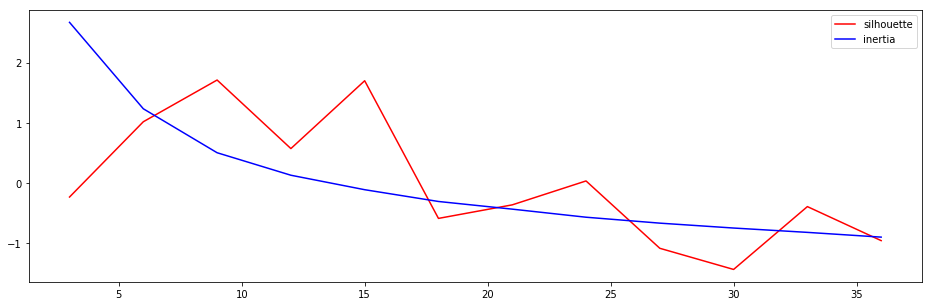

In [31]:

plt.plot(np.arange(12)*3+3,scaler.fit_transform(sil_kmeans.reshape(-1, 1)),'r', label='silhouette')
plt.plot(np.arange(12)*3+3,scaler.fit_transform(inrt.reshape(-1, 1)),'b', label='inertia')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

### Recompute with the optimal K=15

In [32]:
k=15
clf = cluster.KMeans(init='random', n_clusters=k, random_state=0)
clf.fit(datadropnorm)
inrt_opt=clf.inertia_
sil_opt=metrics.silhouette_score(datadropnorm, clf.labels_,  metric='euclidean')
print('Optimal inertia:', inrt_opt, 'Optimal silhouette:', sil_opt)    

Optimal inertia: 44759.85259794554 Optimal silhouette: 0.2421094842239742


## 6. Let's look for alternatives: Spectral clustering

In [33]:
from sklearn.neighbors import kneighbors_graph

spectral = cluster.SpectralClustering(n_clusters=15)
y_pred_spectr=spectral.fit(datadropnorm)


/Users/petia/anaconda/lib/python3.7/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  n_init=n_init)


In [34]:
spectral = cluster.SpectralClustering(n_clusters=i*3+3,  affinity="nearest_neighbors")
spectral.fit(datadropnorm)
print('Silhouette is:', metrics.silhouette_score(datadropnorm, spectral.labels_,  metric='euclidean'))

-0.037080296129869385


In [35]:
sil_spectral=metrics.silhouette_score(datadropnorm, spectral.labels_,  metric='euclidean')
print('Optimal spectral silhouette:', sil_spectral, 'Optimal kmeans silhouette:', sil_opt)    

Optimal spectral silhouette: -0.037080296129869385 Optimal kmeans silhouette: 0.2421094842239742


Is k the optimal?

In [36]:
sil_spectral=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        spectral = cluster.SpectralClustering(n_clusters=i*3+3,  affinity="nearest_neighbors",  eigen_solver='arpack')
        spectral.fit(datadropnorm)
        sil_spectral[i]=metrics.silhouette_score(datadropnorm, spectral.labels_,  metric='euclidean')
print(sil_spectral)

k: 3
k: 6
k: 9
k: 12
k: 15
k: 18
k: 21
k: 24
k: 27
k: 30
k: 33
k: 36
[ 0.1662958  -0.07837623  0.00648426 -0.01662055 -0.01111536 -0.00940805  0.00263435 -0.00214569
 -0.01962245 -0.02723993 -0.03577634 -0.03671086]


In [72]:
#Let's see the silhouette of kmeans and spectral clustering
print(sil_spectral)
print(sil_kmeans)

[ 0.1662958  -0.07837623  0.00625606 -0.02263788 -0.01111536 -0.00882159 -0.00623763 -0.01429478
 -0.01636283 -0.02902232 -0.03702086 -0.04709681]
[0.20792394 0.23005547 0.24232295 0.22216945 0.24210948 0.20163996 0.2056208  0.21265375 0.19285252
 0.18663286 0.20510994 0.19510437]


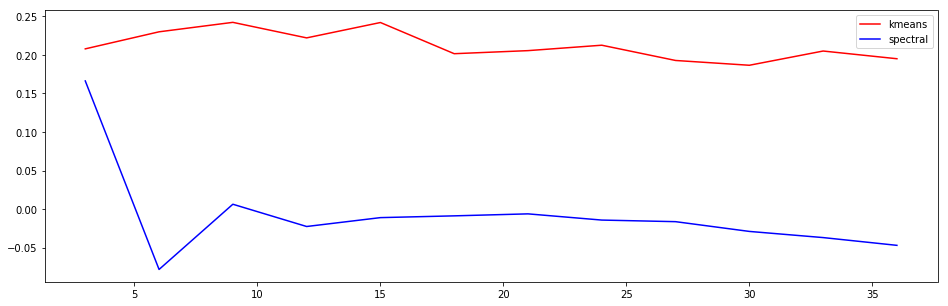

In [73]:
#Let's see the silhouette of kmeans and spectral clustering
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_spectral.reshape(-1, 1),'b', label='spectral')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

Well,... probably our data do not fit very well spectral clustering. We need to visualize them to see why probably...

## 7. Hierarchical clustering

What about the hierarchical clustering? Let's run several iterations with different number of clusters and see:

In [37]:
sil_single=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        single = cluster.AgglomerativeClustering(linkage="single",n_clusters=3*i+3,connectivity=None)
        single.fit(datadropnorm)
        sil_single[i]=metrics.silhouette_score(datadropnorm, single.labels_,  metric='euclidean')
print(sil_single)


k: 3
k: 6
k: 9
k: 12
k: 15
k: 18
k: 21
k: 24
k: 27
k: 30
k: 33
k: 36
[0.84610885 0.7807723  0.76412823 0.70725225 0.67255305 0.61958708 0.60787725 0.52648043 0.52635688
 0.52542958 0.52579923 0.52636406]


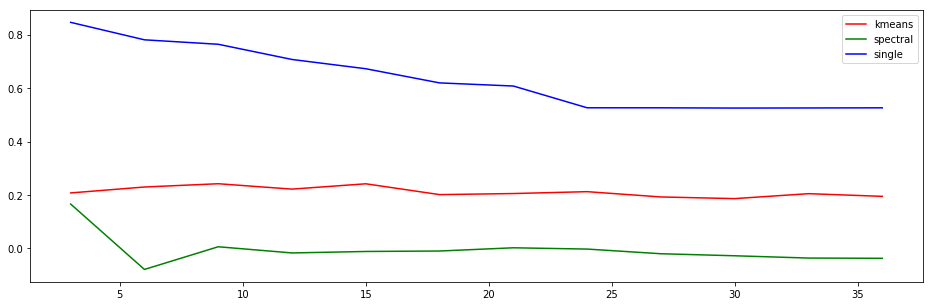

In [38]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_spectral.reshape(-1, 1),'g', label='spectral')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'b', label='single')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

Single agglomerative clustering looks better. But is really finding better solution? Let's add connectivity and see carefully on the clusters:

In [39]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(datadropnorm, n_neighbors=5)
sil_single_con=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        single = cluster.AgglomerativeClustering(linkage="single",n_clusters=3*i+3,connectivity=connectivity)
        single.fit(datadropnorm)
        sil_single_con[i]=metrics.silhouette_score(datadropnorm, single.labels_,  metric='euclidean')
        print('Clusters:[', len(datadropnorm[(single.labels_==0)]),len(datadropnorm[(single.labels_==1)]),
              len(datadropnorm[(single.labels_==2)]),len(datadropnorm[(single.labels_==3)]),']')


print(sil_single)

k: 3
Clusters:[ 8948 1 1 0 ]
k: 6
Clusters:[ 8945 1 1 1 ]
k: 9
Clusters:[ 8942 1 1 1 ]
k: 12
Clusters:[ 8939 1 1 1 ]
k: 15
Clusters:[ 8935 1 2 1 ]
k: 18
Clusters:[ 8930 3 2 1 ]
k: 21
Clusters:[ 8920 8 2 3 ]
k: 24
Clusters:[ 8 8917 2 3 ]
k: 27
Clusters:[ 8917 3 5 1 ]
k: 30
Clusters:[ 8914 3 5 1 ]
k: 33
Clusters:[ 8910 3 2 3 ]
k: 36
Clusters:[ 8907 3 2 2 ]
[0.84610885 0.7807723  0.76412823 0.70725225 0.67255305 0.61958708 0.60787725 0.52648043 0.52635688
 0.52542958 0.52579923 0.52636406]


Well,... I d'nt know if I'm looking exactly with such clusters.... Too unbalnced, right?!

Let's try the ward agglomerative clustering. It theoretically looks for more equivalent and balanced clusters.

In [40]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(datadropnorm, n_neighbors=5)
sil_ward_con=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        ward = cluster.AgglomerativeClustering(linkage="ward",n_clusters=3*i+3,connectivity=connectivity)
        ward.fit(datadropnorm)
        sil_ward_con[i]=metrics.silhouette_score(datadropnorm, ward.labels_,  metric='euclidean')
        print('Clusters:[', len(datadropnorm[(ward.labels_==0)]),len(datadropnorm[(ward.labels_==1)]),
              len(datadropnorm[(ward.labels_==2)]),len(datadropnorm[(ward.labels_==3)]),']')
print(sil_ward_con)

k: 3
Clusters:[ 4810 422 3718 0 ]
k: 6
Clusters:[ 2884 1096 3718 400 ]
k: 9
Clusters:[ 1096 400 968 896 ]
k: 12
Clusters:[ 896 961 968 2108 ]
k: 15
Clusters:[ 233 353 728 1667 ]
k: 18
Clusters:[ 135 451 968 1667 ]
k: 21
Clusters:[ 714 793 968 120 ]
k: 24
Clusters:[ 968 305 1916 315 ]
k: 27
Clusters:[ 379 348 22 315 ]
k: 30
Clusters:[ 47 874 279 315 ]
k: 33
Clusters:[ 874 315 591 380 ]
k: 36
Clusters:[ 315 18 441 380 ]
[0.1654794  0.17915876 0.16570488 0.18222821 0.17992496 0.18089516 0.16373992 0.15347075 0.14368906
 0.14972806 0.1489219  0.15156793]


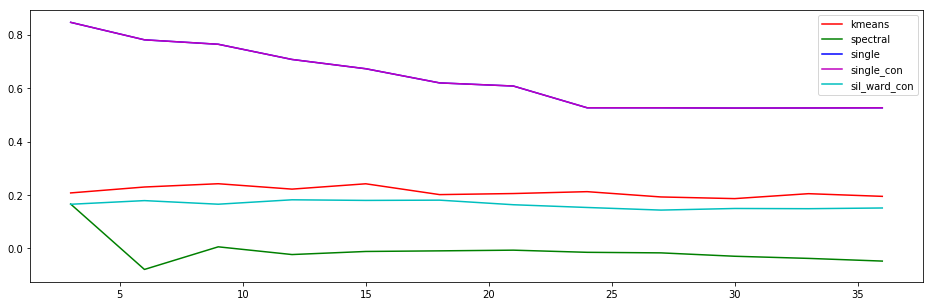

In [96]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_spectral.reshape(-1, 1),'g', label='spectral')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'b', label='single')
plt.plot(np.arange(12)*3+3,sil_single_con.reshape(-1, 1),'m', label='single_con')
plt.plot(np.arange(12)*3+3,sil_ward_con.reshape(-1, 1),'c', label='sil_ward_con')


plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

Ward agglomerative clustering gives more balanced clusters but the silhouette drastically reduced approaching the kmeans clusters. 

And connectivity doesn't help, it seems. WHY?!

In [78]:
print(sil_single_con)
print(sil_single)


[0.84610885 0.7807723  0.76412823 0.70725225 0.67255305 0.61958708 0.60787725 0.52648043 0.52635688
 0.52542958 0.52579923 0.52636406]
[0.84610885 0.7807723  0.76412823 0.70725225 0.67255305 0.61958708 0.60787725 0.52648043 0.52635688
 0.52542958 0.52579923 0.52636406]


May be clusters are too close so connectivity doesn't introduce any differences...

## 8. Interpreting the data

In [43]:
#To ease the interpretation let's consider 9 clusters. In fact the ellbow was suggesting k=9.
K=9

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
clf.fit(datadropnorm)
y_pred = clf.predict(datadropnorm)

In [ ]:
width=0.1
p0 = plt.bar(np.arange(datadropnorm.shape[1])+2*width,scaler.inverse_transform(clf.cluster_centers_[0]),width,color='r', label='cluster 0')
p1 = plt.bar(np.arange(datadropnorm.shape[1]),scaler.inverse_transform(clf.cluster_centers_[1]),width,color='b', label='cluster 1')    
p2 = plt.bar(np.arange(datadropnorm.shape[1])+width,scaler.inverse_transform(clf.cluster_centers_[2]),width,color='yellow', label='cluster 2')
p3 = plt.bar(np.arange(datadropnorm.shape[1])+3*width,scaler.inverse_transform(clf.cluster_centers_[3]),width,color='g', label='cluster 3')
p4 = plt.bar(np.arange(datadropnorm.shape[1])+4*width,scaler.inverse_transform(clf.cluster_centers_[4]),width,color='m', label='cluster 4')
p5 = plt.bar(np.arange(datadropnorm.shape[1])+5*width,scaler.inverse_transform(clf.cluster_centers_[5]),width,color='c', label='cluster 5')
p6 = plt.bar(np.arange(datadropnorm.shape[1])+6*width,scaler.inverse_transform(clf.cluster_centers_[6]),width,color='k', label='cluster 6')
p7 = plt.bar(np.arange(datadropnorm.shape[1])+7*width,scaler.inverse_transform(clf.cluster_centers_[7]),width,color='y', label='cluster 7')
p8 = plt.bar(np.arange(datadropnorm.shape[1])+8*width,scaler.inverse_transform(clf.cluster_centers_[8]),width,color='k', label='cluster 8')

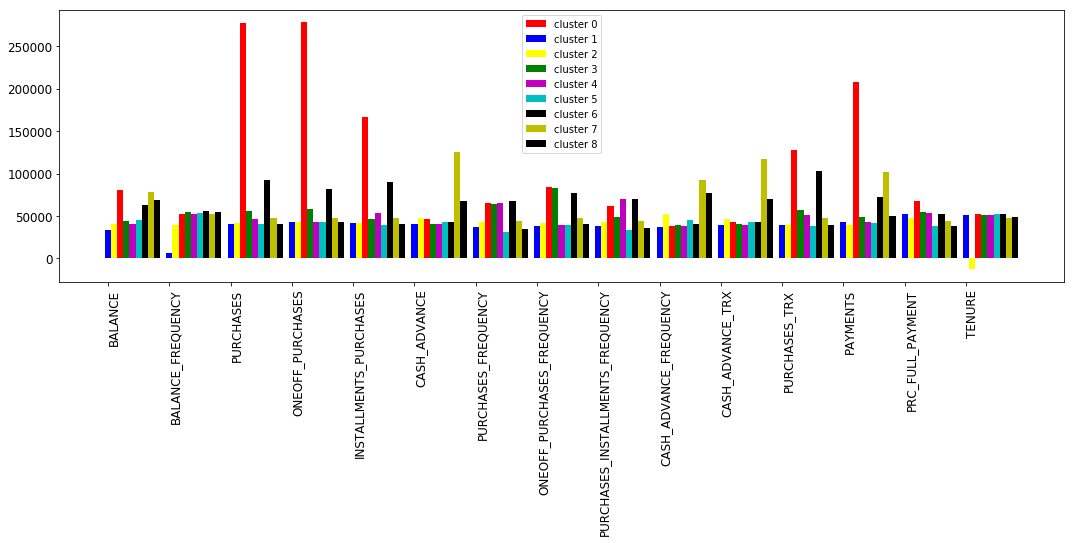

In [44]:
#visualize
plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

plt.legend( loc=9)
plt.yticks(size=12)
fig = plt.gcf()
fig.set_size_inches((18,5))

In [ ]:
ward = cluster.AgglomerativeClustering(linkage="ward",n_clusters=9,connectivity=None)
ward.fit(datadropnorm)
sil_ward_opt=metrics.silhouette_score(datadropnorm, ward.labels_,  metric='euclidean')

In [62]:
#scaler.inverse_transform(datadropnorm[(ward.labels_==0)].mean())
#datadropnorm.shape
datadropnorm[(ward.labels_==0)].mean(axis=0).shape
#datadropnorm.shape[1]

(15,)

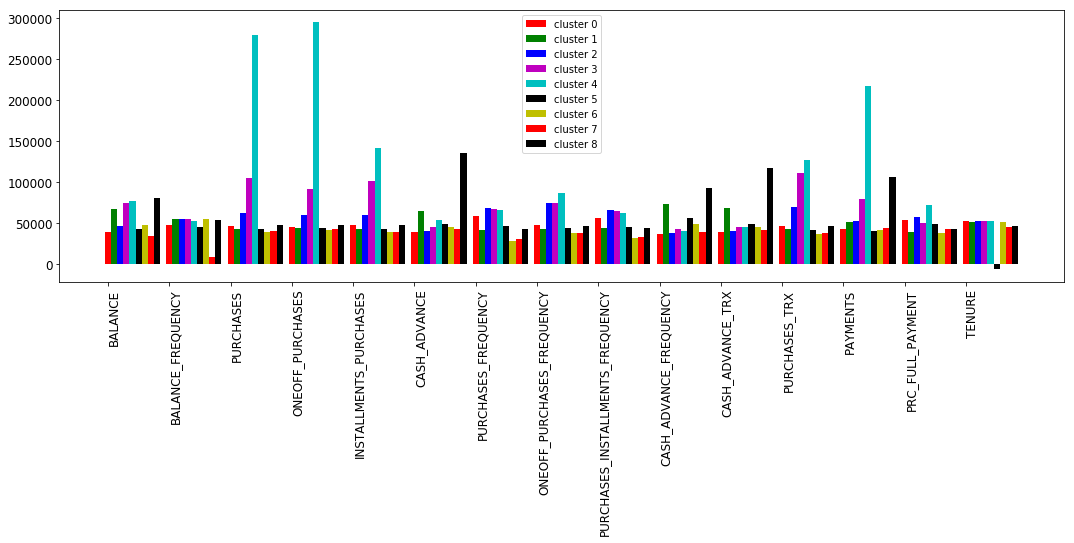

In [69]:
width=0.1

p0 = plt.bar(np.arange(datadropnorm.shape[1]),scaler.inverse_transform(datadropnorm[(ward.labels_==0)].mean(axis=0)),width,color='r', label='cluster 0')

p1 = plt.bar(np.arange(datadropnorm.shape[1])+width,scaler.inverse_transform(datadropnorm[(ward.labels_==1)].mean(axis=0)),width,color='g', label='cluster 1')
p2 = plt.bar(np.arange(datadropnorm.shape[1])+2*width,scaler.inverse_transform(datadropnorm[(ward.labels_==2)].mean(axis=0)),width,color='b', label='cluster 2')
p3 = plt.bar(np.arange(datadropnorm.shape[1])+3*width,scaler.inverse_transform(datadropnorm[(ward.labels_==3)].mean(axis=0)),width,color='m', label='cluster 3')
p4 = plt.bar(np.arange(datadropnorm.shape[1])+4*width,scaler.inverse_transform(datadropnorm[(ward.labels_==4)].mean(axis=0)),width,color='c', label='cluster 4')
p5 = plt.bar(np.arange(datadropnorm.shape[1])+5*width,scaler.inverse_transform(datadropnorm[(ward.labels_==5)].mean(axis=0)),width,color='k', label='cluster 5')
p6 = plt.bar(np.arange(datadropnorm.shape[1])+6*width,scaler.inverse_transform(datadropnorm[(ward.labels_==6)].mean(axis=0)),width,color='y', label='cluster 6')
p7 = plt.bar(np.arange(datadropnorm.shape[1])+7*width,scaler.inverse_transform(datadropnorm[(ward.labels_==7)].mean(axis=0)),width,color='r', label='cluster 7')
p8 = plt.bar(np.arange(datadropnorm.shape[1])+8*width,scaler.inverse_transform(datadropnorm[(ward.labels_==8)].mean(axis=0)),width,color='k', label='cluster 8')

plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

plt.legend( loc=9)
plt.yticks(size=12)
fig = plt.gcf()
fig.set_size_inches((18,5))

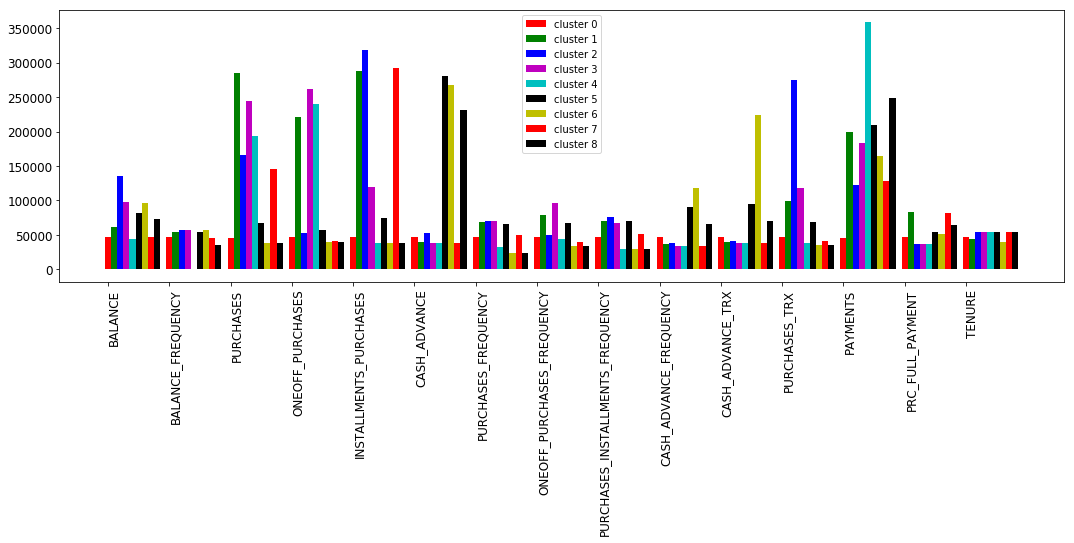

In [72]:
#Compared to the single clustering:
width=0.1

p0 = plt.bar(np.arange(datadropnorm.shape[1]),scaler.inverse_transform(datadropnorm[(single.labels_==0)].mean(axis=0)),width,color='r', label='cluster 0')

p1 = plt.bar(np.arange(datadropnorm.shape[1])+width,scaler.inverse_transform(datadropnorm[(single.labels_==1)].mean(axis=0)),width,color='g', label='cluster 1')
p2 = plt.bar(np.arange(datadropnorm.shape[1])+2*width,scaler.inverse_transform(datadropnorm[(single.labels_==2)].mean(axis=0)),width,color='b', label='cluster 2')
p3 = plt.bar(np.arange(datadropnorm.shape[1])+3*width,scaler.inverse_transform(datadropnorm[(single.labels_==3)].mean(axis=0)),width,color='m', label='cluster 3')
p4 = plt.bar(np.arange(datadropnorm.shape[1])+4*width,scaler.inverse_transform(datadropnorm[(single.labels_==4)].mean(axis=0)),width,color='c', label='cluster 4')
p5 = plt.bar(np.arange(datadropnorm.shape[1])+5*width,scaler.inverse_transform(datadropnorm[(single.labels_==5)].mean(axis=0)),width,color='k', label='cluster 5')
p6 = plt.bar(np.arange(datadropnorm.shape[1])+6*width,scaler.inverse_transform(datadropnorm[(single.labels_==6)].mean(axis=0)),width,color='y', label='cluster 6')
p7 = plt.bar(np.arange(datadropnorm.shape[1])+7*width,scaler.inverse_transform(datadropnorm[(single.labels_==7)].mean(axis=0)),width,color='r', label='cluster 7')
p8 = plt.bar(np.arange(datadropnorm.shape[1])+8*width,scaler.inverse_transform(datadropnorm[(single.labels_==8)].mean(axis=0)),width,color='k', label='cluster 8')

plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

plt.legend( loc=9)
plt.yticks(size=12)
fig = plt.gcf()
fig.set_size_inches((18,5))

Looking at the interpretation plot, one can define the following clusters:

**Big Spenders with large Payments** - they make expensive purchases and have a credit limit that is between average and high. This is only a small group of customers.
    
**Cash Advances with large Payments** - this group takes the most cash advances. They make large payments, but this appears to be a small group of customers.

**Medium Spenders with third highest Payments**- the second highest Purchases group (after the Big Spenders).

**Highest Credit Limit but Frugal** - this group doesn't make a lot of purchases. It looks like the 3rd largest group of customers.

**Cash Advances with Small Payments** - this group likes taking cash advances, but make only small payments.

**Small Spenders and Low Credit Limit** - they have the smallest Balances after the Smallest Spenders, their Credit Limit is in the bottom 3 groups, the second largest group of customers.

**Smallest Spenders and Lowest Credit Limit** - this is the group with the lowest credit limit but they don't appear to buy much. Unfortunately this appears to be the largest group of customers.

**Highest Min Payments** - this group has the highest minimum payments (which presumably refers to "Min Payment Due" on the monthly statement. This might be a reflection of the fact that they have the second lowest Credit Limit of the groups, so it looks like the bank has identified them as higher risk.)



### What marketing strategy do you propose for them? 


## 9. Let's visualize the data - we need PCA

In [123]:
# Let's consider the PCA transform

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
newdataPCA=pca.fit_transform(datadropnorm) 

In [125]:
#visualize the kmeans clusters in the reduced space
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


# To avoid repetition, define ti as a function
def visualize3d(newdataPCA, model):
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(111, projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams['legend.fontsize'] = 10

    ax.plot(newdataPCA[(model.labels_==0), 0], newdataPCA[(model.labels_==0), 1],\
        newdataPCA[(model.labels_==0), 2], 'o', markersize=8, color='blue', alpha=0.5, label='first')

    ax.plot(newdataPCA[(model.labels_==1), 0], newdataPCA[(model.labels_==1), 1],\
        newdataPCA[(model.labels_==1), 2], '^', markersize=8, color='red', alpha=0.5, label='second')

    ax.plot(newdataPCA[(model.labels_==2), 0], newdataPCA[(model.labels_==2), 1],\
        newdataPCA[(model.labels_==2), 2], 'o', markersize=8, color='green', alpha=0.5, label='third')

    ax.plot(newdataPCA[(model.labels_==3), 0], newdataPCA[(model.labels_==3), 1],\
        newdataPCA[(model.labels_==3), 2], 'o', markersize=8, color='yellow', alpha=0.5, label='fourth')

    ax.plot(newdataPCA[(model.labels_==4), 0], newdataPCA[(model.labels_==4), 1],\
        newdataPCA[(model.labels_==4), 2], '*', markersize=8, color='purple', alpha=0.5, label='fifth')

    ax.plot(newdataPCA[(model.labels_==5), 0], newdataPCA[(model.labels_==5), 1],\
        newdataPCA[(model.labels_==5), 2], 'o', markersize=8, color='black', alpha=0.5, label='sext')

    ax.plot(newdataPCA[(model.labels_==6), 0], newdataPCA[(model.labels_==6), 1],\
        newdataPCA[(model.labels_==6), 2], '+', markersize=8, color='red', alpha=0.5, label='seventh')

    ax.plot(newdataPCA[(model.labels_==7), 0], newdataPCA[(model.labels_==7), 1],\
        newdataPCA[(model.labels_==7), 2], 'o', markersize=8, color='cyan', alpha=0.5, label='eight')

    ax.plot(newdataPCA[(model.labels_==8), 0], newdataPCA[(model.labels_==8), 1],\
        newdataPCA[(model.labels_==8), 2], '*', markersize=8, color='magenta', alpha=0.5, label='nine')


    plt.title('Samples from class 0 to class 8 in the PCA space')
    ax.legend(loc='upper right')
    ax.set_xlabel('First PCA base vector')
    ax.set_ylabel('Second PCA base vector')
    ax.set_zlabel('Third PCA base vector')

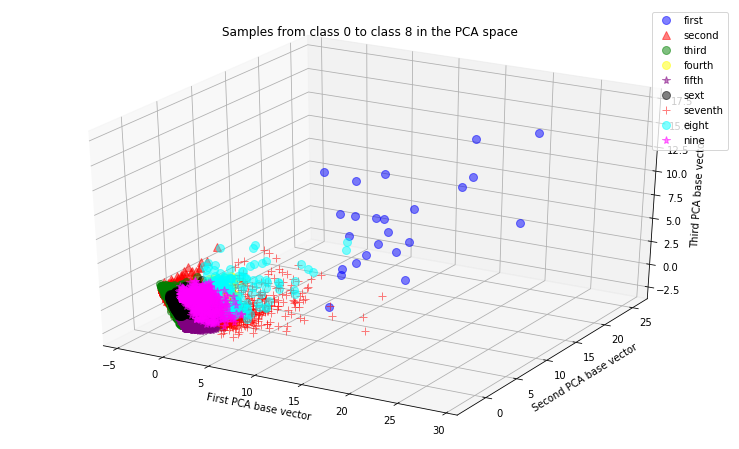

In [126]:
visualize3d(newdataPCA, clf)

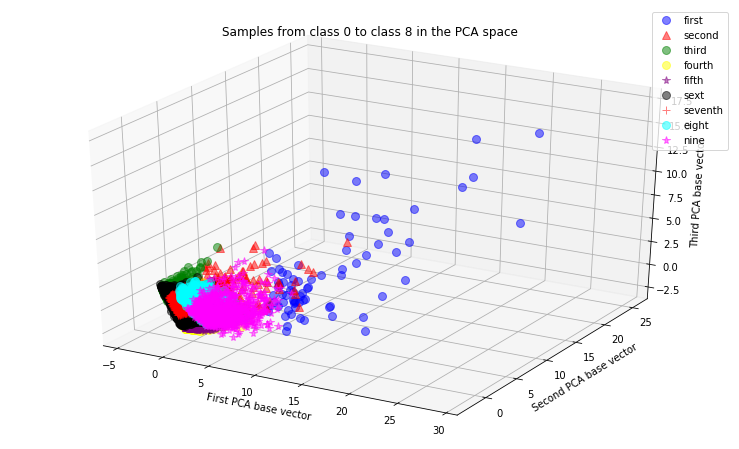

In [127]:
#Clustering in the reduced space
pca = PCA(n_components=9).fit(datadropnorm)
km=cluster.KMeans(init=pca.components_, n_clusters=9, n_init=1)

km.fit(datadropnorm)
visualize3d(newdataPCA, km)

What about the ward clusters?

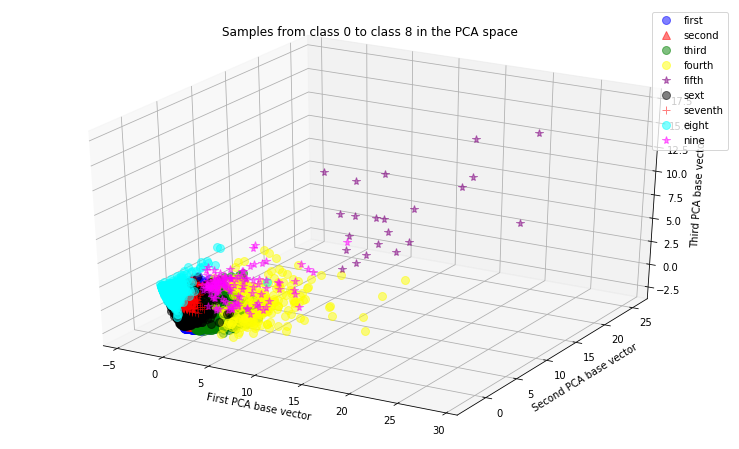

In [128]:
visualize3d(newdataPCA, ward)

How do you expect to be the single agglomerative clustering clusters distributed in space?


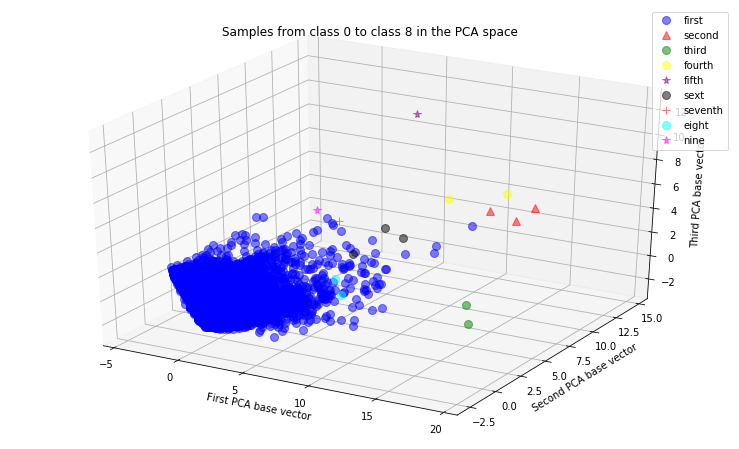

In [129]:
visualize3d(newdataPCA, single)

Probably, in this case the best solutions would be among kmeans and ward agglomerative clustering.

Is now logical that connectivity in this case is not helpful?

You can visualize the Complete and Average Agglomerative clusters.

# 7 Case Study: Amazon Fine Food Reviews


This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

Data are stored in:
     - Reviews.csv: Pulled from the corresponding SQLite table named Reviews as well as 
     - database.sqlite: Contains the table 'Reviews'


### 7.1. Introduction:


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454  from Oct 1999 - Oct 2012<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

### 7.1.2 Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. Text
5. Score - rating between 1 and 5
6. ProfileName
7. HelpfulnessNumerator - number of users who found the review helpful
8. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
9. Time - timestamp for the review

## Goal: Apply clustering techniques to summarize similar opinions on products.
Hint: May be you should explore techniques like Bag of words or Word2Vec to manage textual information.

# 8. Case study: Customer segmentation

Analyze the content of an E-commerce database that lists purchases made by $\sim$4000 customers over a period of one year (from 2010/12/01 to 2011/12/09). The dataset is stored in: ecommerce-data.csv.

## Final goal: develop a model that allows to anticipate the purchases that will be made by a new customer, during the following year.

You can address the following tasks: <br>

___
**1. Data Preparation**

**2. Exploring the content of variables**

   - 2.1 Countries
   - 2.2 Customers and products
       * 2.2.1 Cancelling orders
       * 2.2.2 StockCode
       * 2.2.3 Basket price

**3. Insight on product categories**

   - 3.1 Product description 
   - 3.2 Defining product categories 
       * 3.2.1 Data encoding
       * 3.2.2 Clusters of products
       * 3.2.3 Characterizing the content of clusters
   
**4. Customer categories**

   - 4.1 Formating data
       * 4.1.1 Grouping products 
       * 4.1.2 Time spliting of the dataset
       * 4.1.3 Grouping orders 
   - 4.2 Creating customer categories
       * 4.2.1 Data enconding
       * 4.2.2 Creating categories

**5. Classifying customers**

   - 5.1 Support Vector Machine Classifier (SVC)
       * 5.1.1 Confusion matrix
       * 5.1.2 Learning curves 
   - 5.2 Logistic regression 
   - 5.3 k-Nearest Neighbors
   - 5.4 Decision Tree
   - 5.5 Random Forest
   - 5.6 AdaBoost
   - 5.7 Gradient Boosting Classifier
   

# 9. Additional examples (Optional)
    

Cluster countries according to the activity rates, gender, and age: './files/laborforce/lfsi_act_a_1_Data.csv'

Sentiment analysis in movies recommendations: Kaggle competition: [When bag of words meets bags of popcorn:](https://www.kaggle.com/c/word2vec-nlp-tutorial)
    

[Visualizing the stock market structure:](http://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html)
        


In [43]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

import numpy as np
np.set_printoptions(linewidth=105)